In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf

In [2]:
class TemplateEnough(maf.BaseMetric):
    """Determine how many images have templates. 
    
    Parameters
    ----------
    n_needed : int (5)
        The number of images needed to make a metric
    time_limit : float (455.25)
        How recent an image must be to be able to be used in a template (days)
    lag_time : float (90)
        How old an image must be to be used in a template (days)
    frac : bool (True)
        Report fraction of images that have a template (True, default), or
        the raw number of images with a template (False).
    """
    def __init__(self, n_needed=5, time_limit=365.25+90, lag_time=90., mjd_col="observationStartMJD",
        metric_name="TemplateExistsMetric", frac=True, **kwargs):
        self.n_needed = n_needed
        cols = [mjd_col]
        super(TemplateEnough, self).__init__(
            col=cols, metric_name=metric_name, units="N", **kwargs
        )
        self.mjd_col = mjd_col
        self.time_limit=time_limit
        self.frac = frac
        self.lag_time = lag_time
        
    def run(self, data_slice, slice_point=None):
        data_slice.sort(order=self.mjd_col)
        
        exp_time = data_slice[self.mjd_col] - self.time_limit 
        indx = np.searchsorted(data_slice[self.mjd_col], exp_time)
        
        # XXX--currently assuming all images are good for building template
        # Should probably have seeing and/or SNR cut
        
        indx_right = np.searchsorted(data_slice[self.mjd_col], data_slice[self.mjd_col] - self.lag_time)
        n_before = indx_right - indx
        
        # Could put in some more checking here for if the DCR correction is "good enough"
        # note for DCR correction, we shouldn't need to use a time limit--we can use the 
        # full survey history to figure out the best DCR correction. 
        
        n_with_templates = np.where(n_before >= self.n_needed)[0].size
    
        
        if self.frac:
            n_with_templates = n_with_templates/data_slice.size
            
        # Currently running assuming sql selected a single filter
        # Could loop over filters within metric if we want to compute 
        # what fraction of all visits have good templates. 
        
        return n_with_templates
        

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


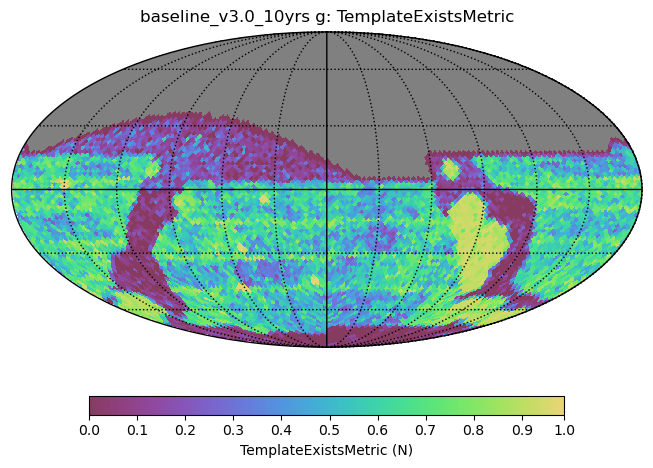

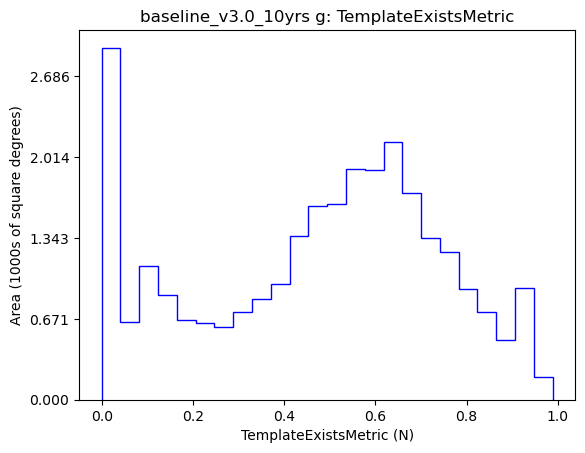

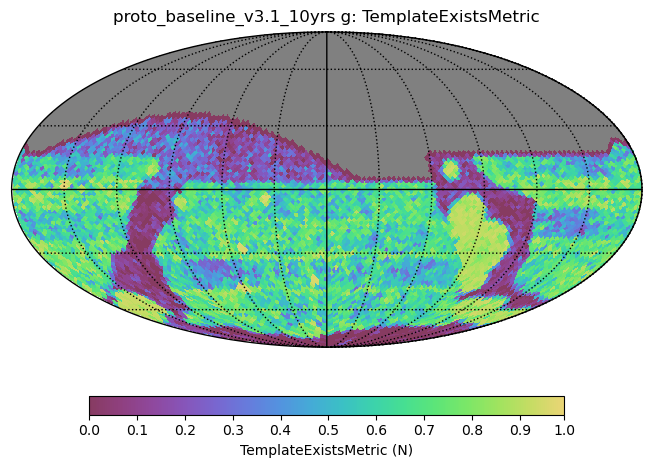

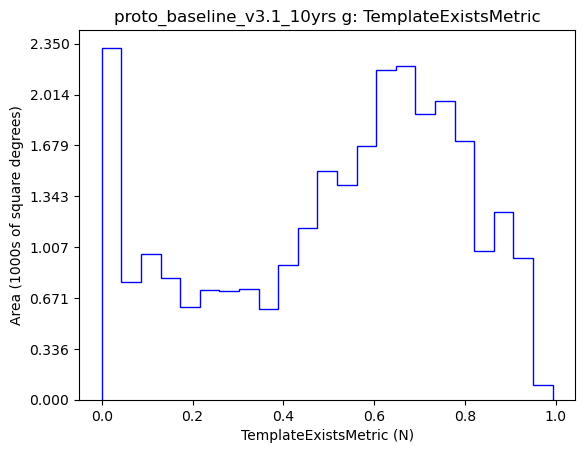

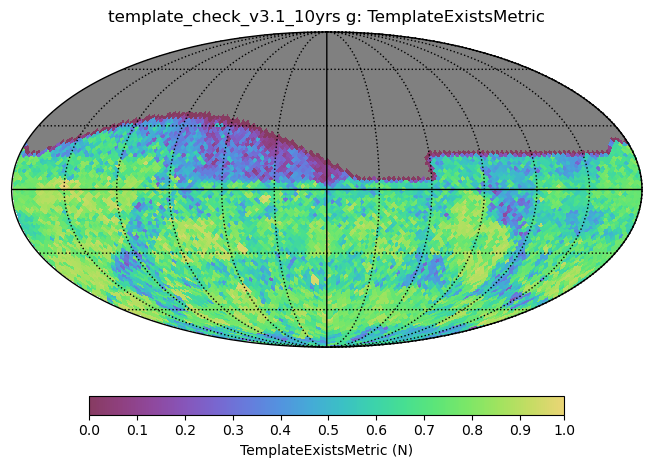

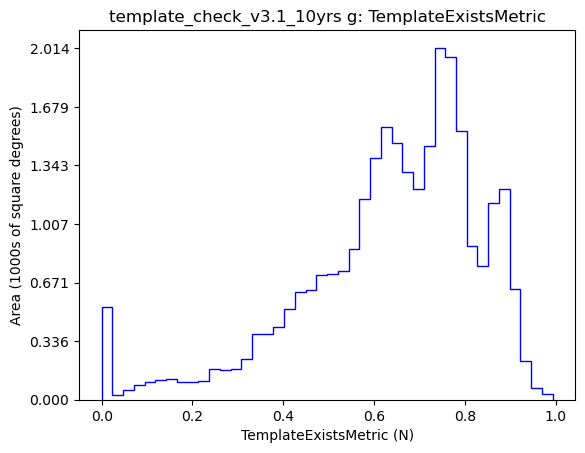

In [3]:
sql = 'filter="g"'

for filename in ['baseline_v3.0_10yrs.db', 'proto_baseline_v3.1_10yrs.db', 'template_check_v3.1_10yrs.db']:

    run_name = filename.replace('.db', '')

    slicer = maf.HealpixSlicer(nside=32)
    metric = TemplateEnough()


    bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name)]
    bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
    bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
    bg.run_all()
    bg.plot_all(closefigs=False)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


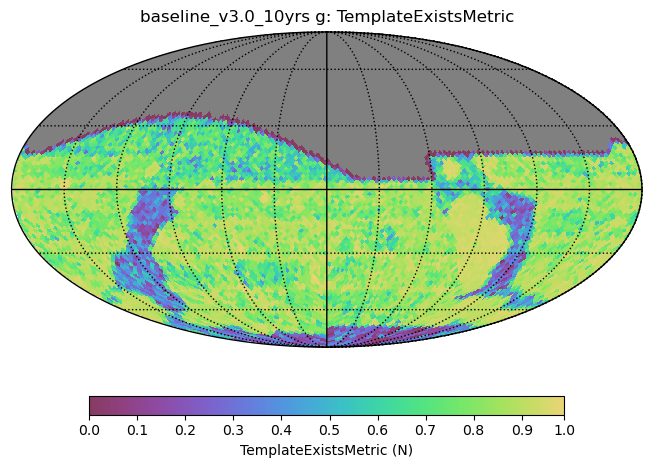

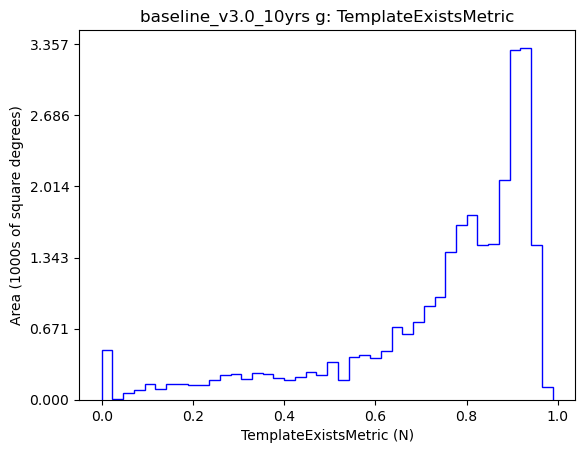

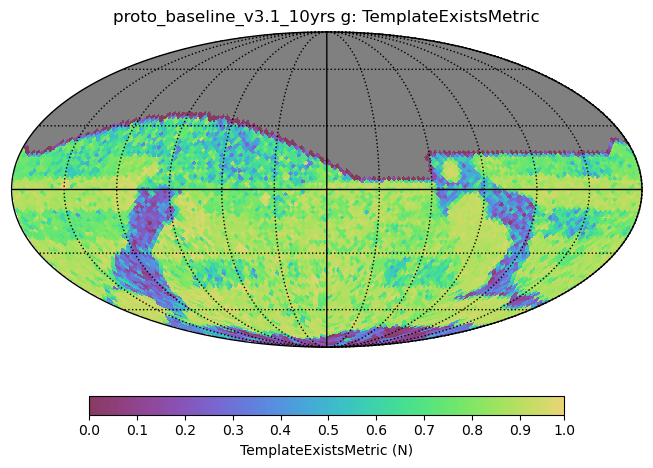

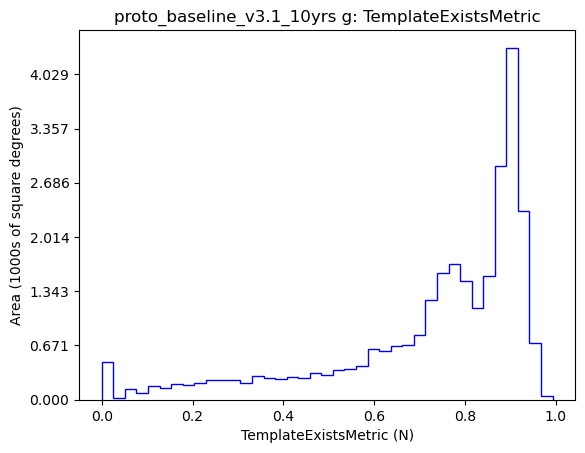

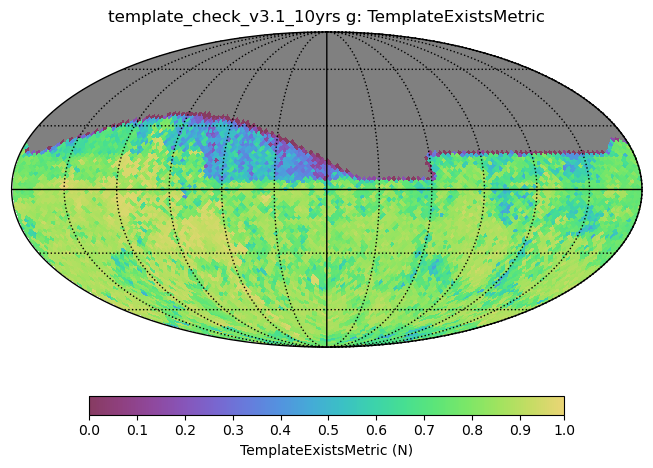

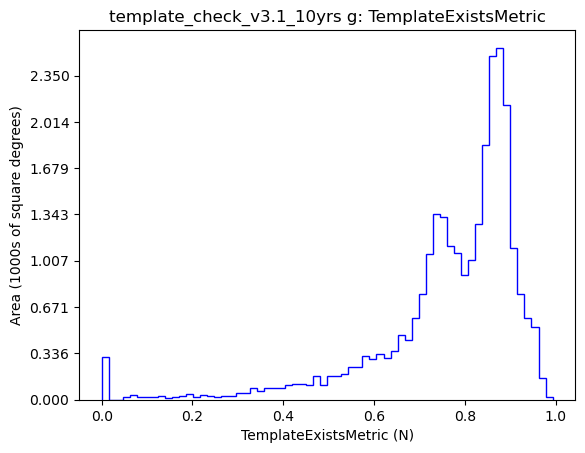

In [4]:

# Is it better if we only need 3 template images?

for filename in ['baseline_v3.0_10yrs.db', 'proto_baseline_v3.1_10yrs.db', 'template_check_v3.1_10yrs.db']:

    run_name = filename.replace('.db', '')

    slicer = maf.HealpixSlicer(nside=32)
    metric = TemplateEnough( n_needed=3)

    bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name)]
    bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
    bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
    bg.run_all()
    bg.plot_all(closefigs=False)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


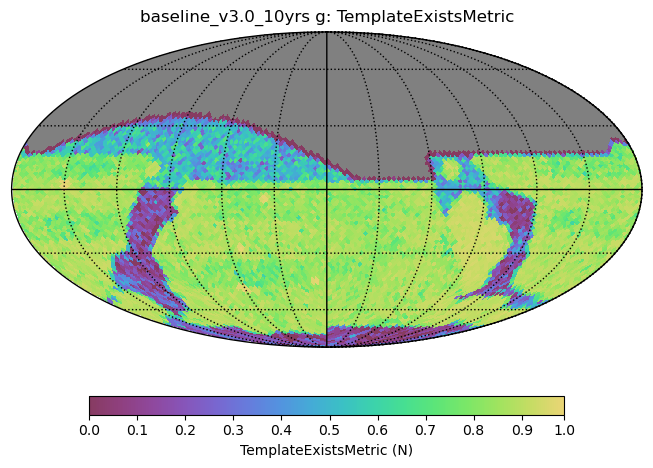

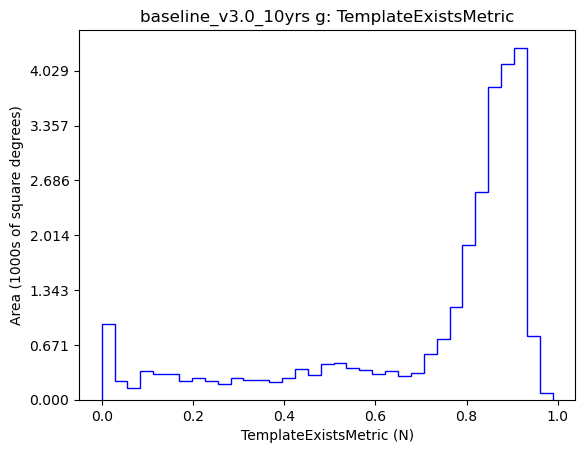

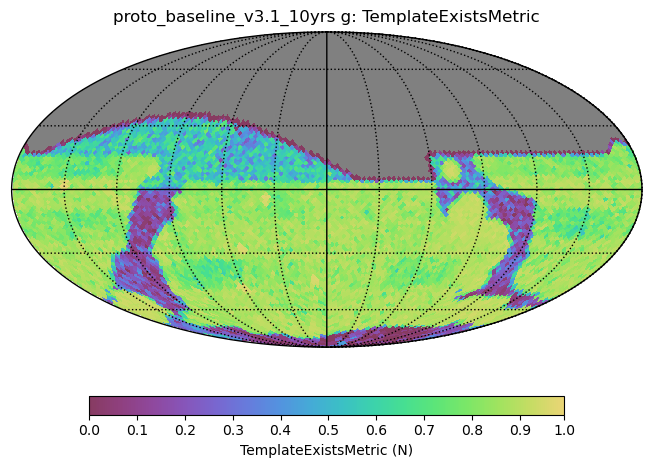

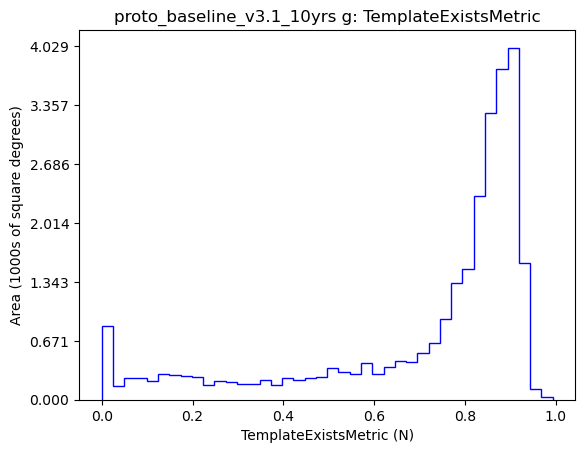

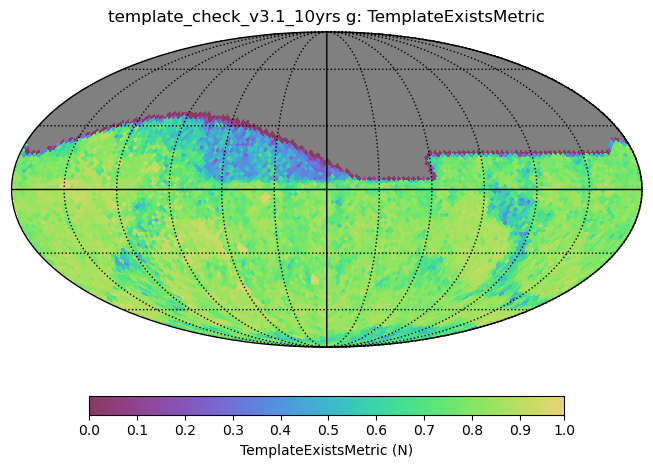

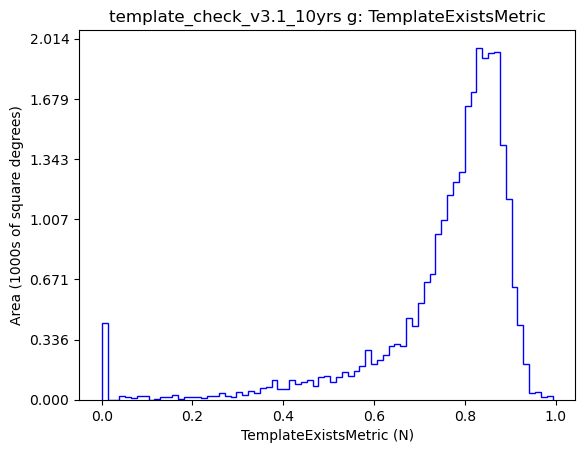

In [5]:
# Is it better if we can go back 2 years?

for filename in ['baseline_v3.0_10yrs.db', 'proto_baseline_v3.1_10yrs.db', 'template_check_v3.1_10yrs.db']:

    run_name = filename.replace('.db', '')

    slicer = maf.HealpixSlicer(nside=32)
    metric = TemplateEnough( time_limit=365.25*2)

    bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name)]
    bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
    bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
    bg.run_all()
    bg.plot_all(closefigs=False)